In [562]:
import numpy as np
from math import pi, e, sqrt
import scipy.stats
import matplotlib.pyplot as plt
from collections import Counter
import bisect

**Question 1**

*Normal Distribution*

In [195]:
'''Parameters'''
mu = 0 #mean
sigma = 1 #std
a = -3 #left truncation
b = 3 #right truncation
ngrid = 200
nsample = 10**6
dx = (b-a)/nsample

x = np.linspace(a,b,nsample) #Bins for values

In [183]:
'''PDF & CDF w/ stats function'''
norm = scipy.stats.norm(mu,sigma)
pdf = norm.pdf(x)
cdf = norm.cdf(x)

In [203]:
'''PDF & CDF from scratch'''
pdf_o = e**(-0.5*((x-mu)/sigma)**2)/sqrt(2*pi*(sigma**2))

cdf_cumsum = np.cumsum(pdf)*(dx)

cdf_loop = []
a = 0
for i in pdf:
    a = (a+i)
    cdf_loop.append(a*dx)
cdf_loop = np.array(cdf_loop)

cdf_trap = scipy.integrate.cumtrapz(pdf_o)*(dx)
cdf_trap = np.append(cdf_trap, cdf_trap[-1])

cdf_loop_trap = []
b = 0
for i in range(len(pdf)):
    if i==0 or i==(len(pdf)-1):
        b = b+0.5*pdf[i]
    else:
        b += pdf[i]
    cdf_loop_trap.append(b*dx)
cdf_loop_trap = np.array(cdf_loop_trap)

correction_vector = np.ones(nsample)
correction_vector[0] = correction_vector[0]*0.5
correction_vector[-1] = correction_vector[-1]*0.5
cdf_cumsum_trap = np.cumsum(pdf_o*correction_vector)
cdf_cumsum_trap = cdf_cumsum_trap*(dx)

Text(0.5, 0, 'x')

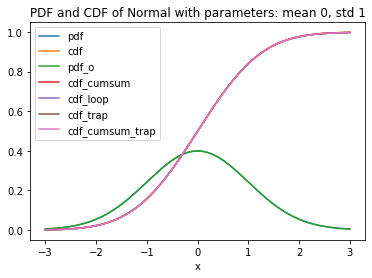

In [204]:
plt.plot(x,pdf,label="pdf")
plt.plot(x,cdf,label="cdf")
plt.plot(x,pdf_o,label="pdf_o")
plt.plot(x,cdf_cumsum,label='cdf_cumsum')
plt.plot(x,cdf_loop,label='cdf_loop')
plt.plot(x,cdf_trap,label='cdf_trap')
plt.plot(x,cdf_cumsum_trap,label='cdf_cumsum_trap')
plt.legend()
plt.title(f"PDF and CDF of Normal with parameters: mean {mu}, std {sigma}")
plt.xlabel("x")

In [205]:
diff_vec = cdf_cumsum - cdf_cumsum_trap
print("First 10: ", diff_vec[:10])
print("")
print("Mid 10: ", diff_vec[int((len(pdf)/2-10)):int(len(pdf)/2)])

First 10:  [1.32955452e-08 1.32955452e-08 1.32955452e-08 1.32955452e-08
 1.32955452e-08 1.32955452e-08 1.32955452e-08 1.32955452e-08
 1.32955452e-08 1.32955452e-08]

Mid 10:  [1.32955452e-08 1.32955452e-08 1.32955453e-08 1.32955452e-08
 1.32955452e-08 1.32955452e-08 1.32955452e-08 1.32955453e-08
 1.32955453e-08 1.32955452e-08]


Text(0.5, 0, 'x')

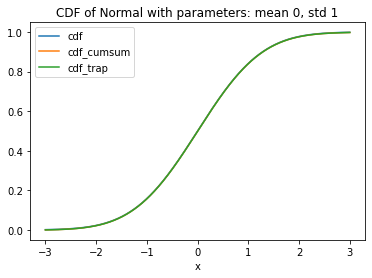

In [206]:
plt.plot(x,cdf,label="cdf")
plt.plot(x,cdf_cumsum,label='cdf_cumsum')
plt.plot(x,cdf_trap,label='cdf_trap')
plt.legend()
plt.title(f"CDF of Normal with parameters: mean {mu}, std {sigma}")
plt.xlabel("x")

**Question 2**

In [25]:
n = 3
A = np.random.rand(n,n)
B = np.random.rand(n,n)

In [26]:
C1 = np.dot(A,B)
print("** C1=A*B **")
print(np.matrix(C1))
print("")
C2 = np.matmul(A,B)
print("** C2=matmul(A,B) **")
print(np.matrix(C2))

** C1=A*B **
[[0.80434927 0.67136498 0.55805325]
 [1.43501228 0.84844322 1.03293465]
 [0.71808787 0.50755649 0.4901654 ]]

** C2=matmul(A,B) **
[[0.80434927 0.67136498 0.55805325]
 [1.43501228 0.84844322 1.03293465]
 [0.71808787 0.50755649 0.4901654 ]]


In [6]:
def c3f(n,A,B):
    C_3f = np.zeros((n,n))
    for i in range(len(A[0])):
        for j in range(len(B[0])):
            ij = 0 
            for k in range(n):
                ij += A[i,k]*B[k,j]
            C_3f[i][j] = ij
    return (C_3f)
#print("C with 3 for loops:")
#print(np.matrix(C_3f))
#print("")
        

def c2f(n,A,B):  
    C_2f = np.zeros((n,n))
    for i in range(len(A[0])):
        for j in range(len(B[0])):
            C_2f[i][j] = sum(A[i,:]*B[:,j])
    return C_2f
#print("C with 2 for loops:")
#print(np.matrix(C_2f))

In [7]:
def c3f_loopswap(n,A,B):
    C_3f_loopswap = np.zeros((n,n))
    for j in range(len(A[0])):
        for i in range(len(B[0])):
            ij = 0 
            for k in range(n):
                ij += A[i,k]*B[k,j]
            C_3f_loopswap[i][j] = ij
    return C_3f_loopswap
#print("C with 3 for loops ij swaped:")
#print(np.matrix(C_3f_loopswap))
#print("")

In [23]:
def c2f_transpose (n,A,B):
    C_2f_transpose = np.zeros((n,n))
    A_t = np.transpose(A)
    for i in range(len(A[0])):
        for j in range(len(B[0])):
            C_2f_transpose[i][j] = sum(A_t[:,i]*B[:,j])
    return C_2f_transpose
#print("C with 2 for loops - A transposed:")
#print(np.matrix(C_2f_transpose))

In [27]:
c2f_transpose (3,A,B)

array([[0.80434927, 0.67136498, 0.55805325],
       [1.43501228, 0.84844322, 1.03293465],
       [0.71808787, 0.50755649, 0.4901654 ]])

In [12]:
import time
import timeit

In [28]:
N_times = [10,100,1000]

for n in N_times:
    A = np.random.rand(n,n)
    B = np.random.rand(n,n)
    print("")
    print(f'n = {n}, "C_3F, time:')
    %timeit c3f(n,A,B)
    print("")
    print(f'n = {n}, "C_2F, time:')
    %timeit c2f(n,A,B)
    print("")
    print(f'n = {n}, "C_2F_Transpose, time:')
    %timeit c2f_transpose(n,A,B)
    print("")
    print(f'n = {n}, "C_3F_loopswap, time:')
    %timeit c3f_loopswap(n,A,B)


n = 10, "C_3F, time:
432 µs ± 1.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

n = 10, "C_2F, time:
288 µs ± 948 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

n = 10, "C_2F_Transpose, time:
293 µs ± 1.83 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

n = 10, "C_3F_loopswap, time:
432 µs ± 1.05 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

n = 100, "C_3F, time:
373 ms ± 1.24 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

n = 100, "C_2F, time:
104 ms ± 360 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

n = 100, "C_2F_Transpose, time:
104 ms ± 258 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

n = 100, "C_3F_loopswap, time:
374 ms ± 1.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

n = 1000, "C_3F, time:
6min 31s ± 3.21 s per loop (mean ± std. dev. of 7 runs, 1 loop each)

n = 1000, "C_2F, time:
1min 29s ± 1.04 s per loop (mean ± std. dev. of 7 runs, 1 loop each)

n = 1000, "C_2F_Transpose, time:

**Assignment 2**

In [563]:
import random

In [34]:
# Random uniform number with inbuild function
random.random()

0.014932565360393446

In [373]:
def seedLCG(initVal):
    global rand
    rand = initVal

def lcg():
    a = 1140671485
    c = 128201163
    m = 2**24
    global rand
    rand = ((a*rand + c) % m)/m
    return rand

seedLCG(1)

for i in range(100):
    print (lcg())

0.6307034492492676
0.522482576953422
0.16461920381109252
0.8337322873304203
0.3262749482177014
0.8245962084402798
0.7051191691722565
0.5819566727688326
0.2082224567462987
0.7982877461402893
0.9164247421709817
0.9484786118814839
0.12779937419836074
0.3303771584579245
0.10350268770939408
0.6784619981626143
0.769553778184445
0.9628218382007816
0.10298555916043028
0.6433027804543592
0.37910252127068134
0.41630690724088026
0.9458077608473374
0.9462100321207743
0.9735601819217976
0.8330782323841532
0.2818061980490256
0.8011961824170442
0.11416734301928244
0.40354464651997546
0.07811034975888731
0.9520542414986721
0.37090399568313615
0.8588947384546088
0.03705285618931953
0.16058322745338316
0.5593290046062052
0.6697827153046063
0.17945525013431762
0.8424249685858811
0.9172844241819007
0.006927806075736953
0.11240159536617433
0.2834926666440474
0.9158580331489716
0.9099484515915321
0.5081600278832639
0.19083885092997832
0.6163882306809434
0.5492006198974977
0.9811607397436646
0.34983498019602

In [527]:
# Random uniform with LCG
N = 1

def seed(N):
    global U
    U = N

def random_LCG (M,a,b):
    global U
    U = ((a*U+b)%M)/M
    return U

seed(N)

def generate_lcg (M,a,b,N,n):
    l = []
    for _ in range(n):
        N = ((a*N+b)%M)
        l.append(N/M)
        #print(N)
    return np.array(l)

params_stackoverflow = generate_lcg(M = 2**24, a = 1140671485, b = 128201163, N = 1, n=10000)
params203 = generate_lcg(M=244944, a=1592, b=51749, N = 1, n=10000)
params208 = generate_lcg(M=2048,a=1229,b=1, N = 1, n=10000)
x = np.linspace(0,1,10000)

Standard Uniform Distribution mean and variance

Mean = (A+B)/2 == 1/2

STD = sqrt((B-A)^2/12) == sqrt(1/12) = 0.28867

In [528]:
mean_203 = sum(params203)/len(params203)
std_203 = sqrt(sum((params203-mean_203)**2)/len(params203))
print(f'Mean 203: {mean_203}')
print(f'STD 203: {std_203}')
print("")

mean_208 = sum(params208)/len(params208)
std_208 = sqrt(sum((params208-mean_208)**2)/len(params208))
print(f'Mean 208: {mean_208}')
print(f'STD 208: {std_208}')
print("")

mean_so = sum(params_stackoverflow)/len(params_stackoverflow)
std_so = sqrt(sum((params_stackoverflow-mean_so)**2)/len(params_stackoverflow))
print(f'Mean Stack Overflow: {mean_so}')
print(f'STD Stack Overflow: {std_so}')
print("")

Mean 203: 0.5023601868182107
STD 203: 0.2887444757970348

Mean 208: 0.499857421875
STD 208: 0.28897617759989364

Mean Stack Overflow: 0.49877416558265686
STD Stack Overflow: 0.28910579721219865



In [ ]:
import plotly.express as px

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'x')

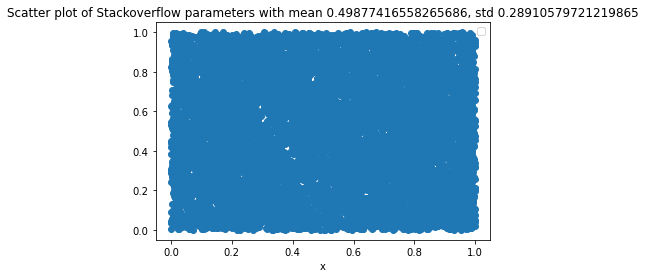

In [529]:
plt.scatter(x=params_stackoverflow[1:], y=params_stackoverflow[0:-1])
plt.legend()
plt.title(f"Scatter plot of Stackoverflow parameters with mean {mean_so}, std {std_so}")
plt.xlabel("x")

Text(0.5, 0, 'x')

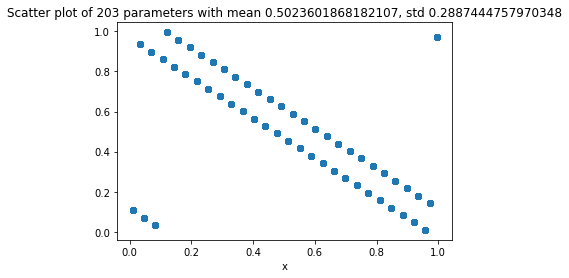

In [530]:
plt.scatter(x=params203[1:], y=params203[0:-1])
#plt.legend()
plt.title(f"Scatter plot of 203 parameters with mean {mean_203}, std {std_203}")
plt.xlabel("x")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'x')

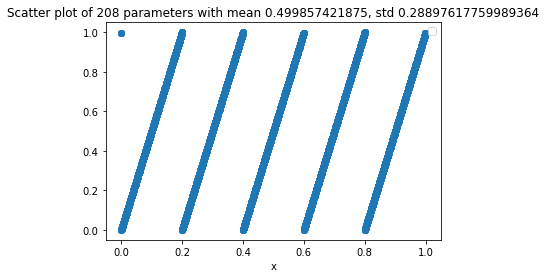

In [536]:
plt.scatter(x=params208[1:], y=params208[0:-1])
plt.legend()
plt.title(f"Scatter plot of 208 parameters with mean {mean_208}, std {std_208}")
plt.xlabel("x")

Text(0.5, 0, 'x')

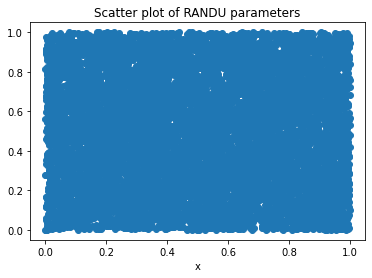

In [537]:
params_randu = generate_lcg(M=2**32,a=65539,b=0, N = 1, n=10000)
plt.scatter(x=params_randu[1:], y=params_randu[0:-1])
plt.title(f"Scatter plot of RANDU parameters")# with mean {mean_208}, std {std_208}")
plt.xlabel("x")

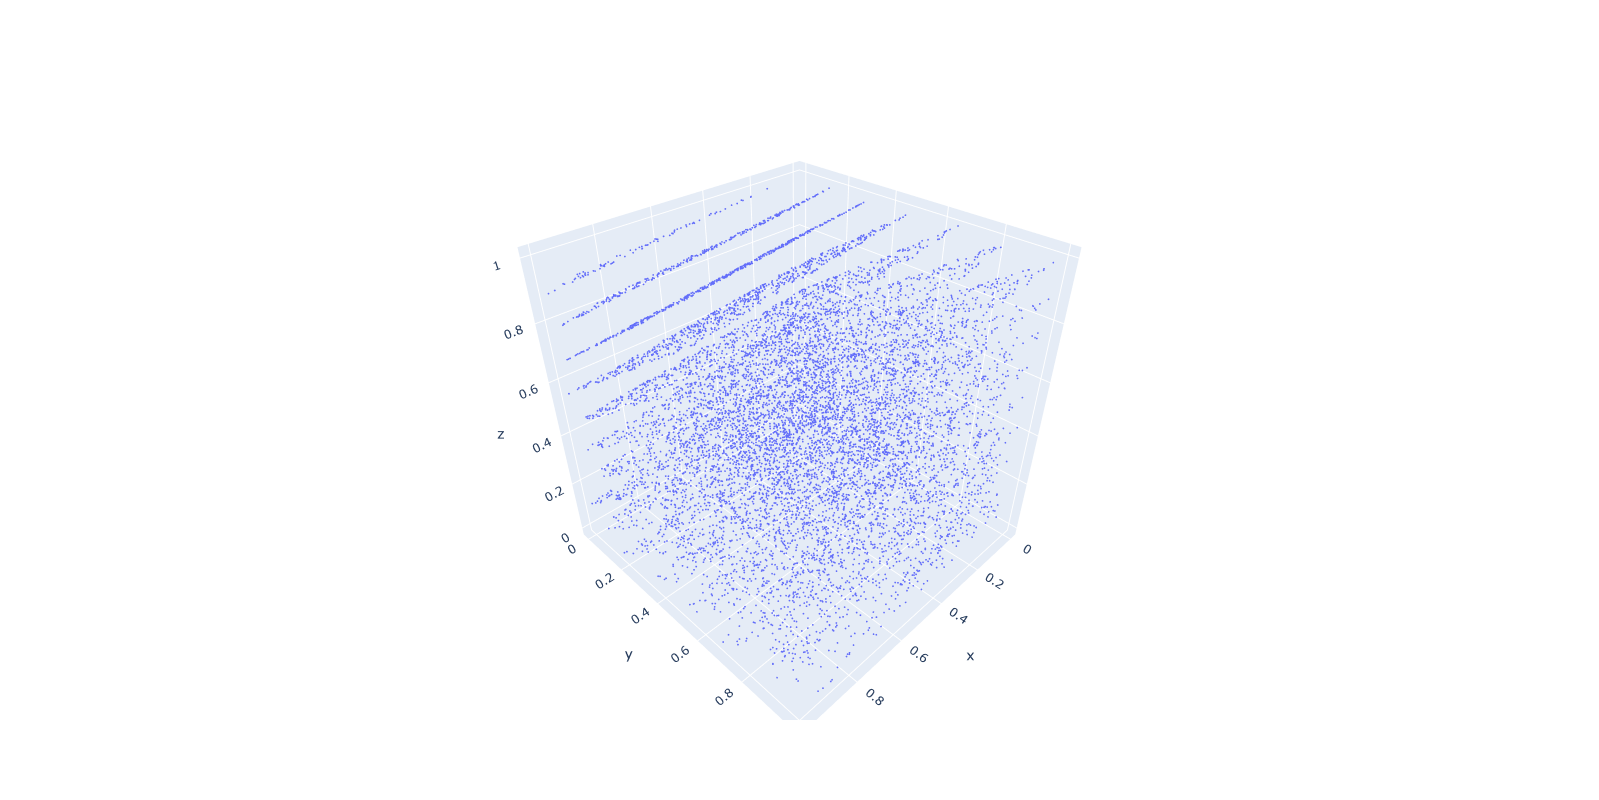

In [558]:
#plt.scatter(x=params_randu[2:], y=params_randu[1:-1], z=params_randu[0:-2])

#fig = px.scatter_3d(x=params_randu[2:], y=params_randu[1:-1], z=params_randu[0:-2])
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter3d(x=params_randu[2:], y=params_randu[1:-1], z=params_randu[0:-2], mode='markers', marker=dict(size=1)))
fig.update_layout(
    autosize=True,
    width=800,
    height=800,
)

fig.show()


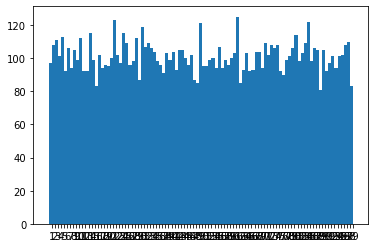

In [534]:
x = np.linspace(0,1,100)
prob = x.searchsorted(params_stackoverflow)
labels, values = zip(*Counter(np.sort(prob)).items())
indexes = np.arange(len(labels))
width=1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [560]:
'''Question 2'''
#U = Uniform[-pi/2, pi/2]
#distribution of cos(U)

'Question 2'

In [584]:
from math import cos

In [608]:
U = np.random.uniform(low=-pi/2, high=pi/2, size=10000)
cosU = np.cos(U)

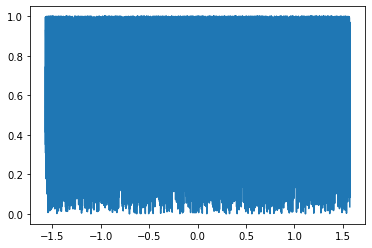

In [599]:
x_c = np.linspace(-pi/2,pi/2,10000)
plt.plot(x_c, cosU)

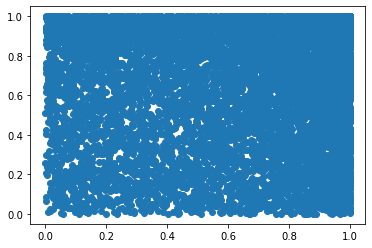

In [602]:
plt.scatter(x=cosU[1:], y=cosU[0:-1])

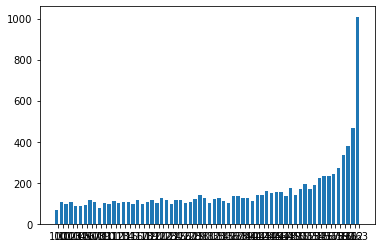

In [609]:
x = np.linspace(-pi/2,pi/2,200)
prob_cos = x.searchsorted(cosU)
labels_c, values_c = zip(*Counter(np.sort(prob_cos)).items())
indexes_c = np.arange(len(labels_c))
width=0.7
plt.bar(indexes_c, values_c, width)
plt.xticks(indexes_c + width * 0.5, labels_c)
plt.show()

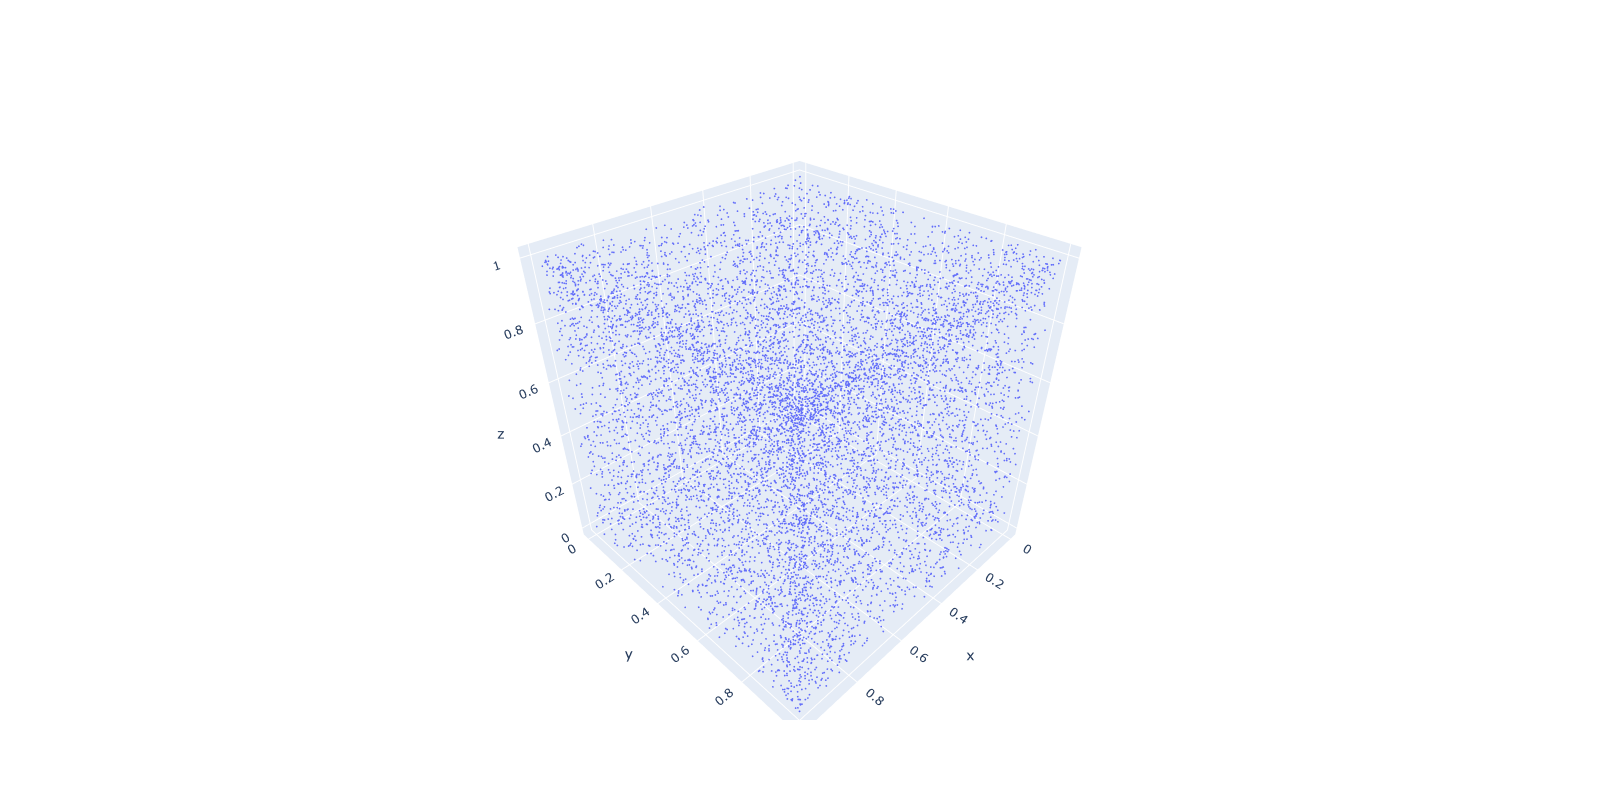

In [596]:
fig = go.Figure(data=go.Scatter3d(x=cosU[2:], y=cosU[1:-1], z=cosU[0:-2], mode='markers', marker=dict(size=1)))
fig.update_layout(
    autosize=True,
    width=800,
    height=800,
)

fig.show()